In [ ]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,#
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO #
# DESTE EP. #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM #
# DESONESTIDADE ACADÊMICA OU PLÁGIO. #
# #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. #
# #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR #
# DESONESTIDADE ACADÊMICA. #
# #
# #
# Nome : William Garib Gugel
# NUSP : 11238131
# Turma: #
# Prof.: #
##################################################################

In [110]:
from ImageBase import ImageBase
import numpy as np
import pandas as pd
from cv2 import imwrite, cvtColor, COLOR_BGR2GRAY, resize
import matplotlib.pyplot as plt

In [159]:
x=ImageBase("./augmentedDataSet/")
x.data.reset_index(inplace=True)

y=ImageBase("./ImageBase/")

# Função que Faz a Equalização do Histograma

In [2]:
def equalizar(img):
    c = 255 / img.size
    aux = pd.Series(img.reshape(img.size)).value_counts()
    
    prob = [0] * 256
    for i in aux.index: prob[i] = aux[i]
    prob = np.array(prob)
    
    transfom = dict(zip(range(256), 256 * [0]))
    for k in range(256):
        transfom[k] = c * prob[0:k+1].sum()
    
    return np.vectorize(transfom.get)(img).round()

# Função que Cria os Arquivos Normalizados

In [4]:
def process():
    c = 1
    for i in x.data.index:
        name = x[i].id
        img = x.getById(i)
        name = str(x[i].path).split('\\', 1)[1].replace('\\', '/')

        imwrite('./normalizedDataSet/' + name, equalizar(img))
        
        if c % 100 == 0: print(c)
        c += 1

# Executando o Processo

In [5]:
# process()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060


# Mapeando as Imagens Geradas

In [173]:
z = ImageBase("./normalizedDataSet/")
z.data.reset_index(inplace=True)

# Calculo do Histograma

In [88]:
def soma_histogramas(lista, size):
    output = pd.Series(np.zeros(256))
    for img in lista:
        for i, soma in pd.Series(x.getById(img).reshape(size)).value_counts().items():
            output.iloc[i] += soma
        # End For
    return output.astype(int)

In [125]:
histograma_interno = x.data[x.data.iluminacao == 'I'].index
qtd = histograma_interno.shape
interno = soma_histogramas(histograma_interno, 808800) / qtd

In [126]:
histograma_interno = x.data[x.data.iluminacao == 'E'].index
qtd = histograma_interno.shape
externo = soma_histogramas(histograma_interno, 808800) / qtd

In [178]:
histograma_interno = z.data[x.data.iluminacao == 'I'].index
qtd = histograma_interno.shape
interno_normalzado = soma_histogramas(histograma_interno, 808800) / qtd

In [181]:
histograma_interno = z.data[x.data.iluminacao == 'E'].index
qtd = histograma_interno.shape
externo_normalzado = soma_histogramas(histograma_interno, 808800) / qtd

# Plotando os Resultados

### Iluminação Interna

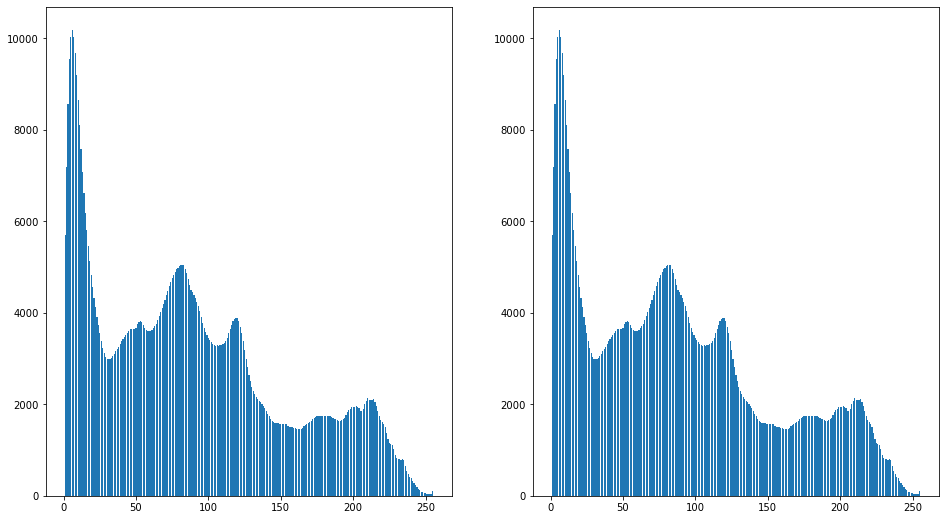

In [180]:
img, ax = plt.subplots(2,2, figsize=(20,20))
_=ax[0][1].bar(interno_normalzado[1:].index, interno[1:])
_=ax[0][0].bar(interno[1:].index, interno[1:])
_=ax[1][0].imshow(z.getById(18))
_=ax[1][1].imshow(y.getById(x[18].id), 'gray')

In [1]:
img, ax = plt.subplots(2,2, figsize=(20,20))
_=ax[0][1].bar(externo_normalzado[1:].index, externo[1:])
_=ax[0][0].bar(externo[1:].index, externo[1:])
_=ax[1][0].imshow(z.getById(18))
_=ax[1][1].imshow(y.getById(x[18].id), 'gray')

NameError: name 'plt' is not defined